# 27. HEPTA CLUSTER: DATA EXPLORATION
---

## 1. Introducing the Data
- **Source**: Ultsch, A.: Clustering with SOM: U*C,
    - In Proc. Workshop on Self-Organizing Maps, Paris, France, 2005, 75-82.

    - Web: https://www.uni-marburg.de/fb12/arbeitsgruppen/datenbionik/data

    - One of the datasets in the Fundamental Clustering Problems Suite (FCPS).

    - `labels0` come from the Author. `0` denotes the noise class (if present).
- **Downloaded from:** https://github.com/gagolews/clustering_benchmarks_v1/tree/master/fcps

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

hepta_cols = ['col1', 'col2', 'col3']
hepta = pd.read_csv('data/hepta.data.gz', 
                    delimiter="\t", header=None)
noise = pd.read_csv('data/hepta.labels0.gz', 
                    delimiter="\t", header=None)
hepta.columns = hepta_cols
hepta['labels'] = noise
print(hepta.shape)
hepta.head()

(212, 4)


,col1,col2,col3,labels
0,-6.327e-02,0.028,0.023,1
1,-7.310e-04,0.048,0.069,1
2,-6.077e-02,-0.009,0.053,1
3,1.325e-02,-0.012,0.055,1
4,-5.451e-02,-0.004,0.002,1


## 2. Understanding Data Types

In [3]:
hepta.isnull().sum()

col1      0
col2      0
col3      0
labels    0
dtype: int64

In [4]:
hepta.dtypes.value_counts()

float64    3
int64      1
dtype: int64

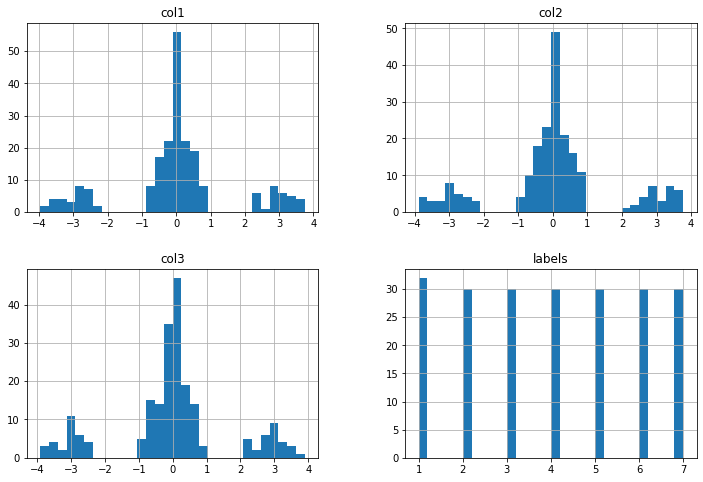

In [6]:
import matplotlib.pyplot as plt

hepta.hist(bins=30, figsize=(12,8))
plt.show()

So the first 3 columns seem to be very simillar, with minor virations:
- There are centered at around zero,
- They seem to be almost symmetrical
- There two empty spaces roughly between -2 and -1 and between 1 and 2

The first 3 columns are continuous, while our label column is nominal. 

## 3. Looking into the Basic Stats

In [12]:
hepta_stats = hepta.describe().T
hepta_stats['max-min'] = hepta.max()-hepta.min()
hepta_stats

,count,mean,std,min,25%,50%,75%,max,max-min
col1,212.0,0.015,1.648,-3.970,-0.407,-0.004,0.439,3.748,7.718
col2,212.0,0.034,1.671,-3.881,-0.477,-0.005,0.501,3.774,7.656
col3,212.0,-0.036,1.629,-3.909,-0.423,0.021,0.384,3.899,7.809
labels,212.0,3.972,2.016,1.000,2.000,4.000,6.000,7.000,6.000
